**Problem statement**
The main purpose is to build a CNN model that would classify if subject has a tumor or not base on MRI scan. I used the VGG-16 model architecture and weights to train the model for this binary problem. I used accuracy as a metric to justify the model performance . 

**What is Brain Tumor?**

A brain tumor occurs when abnormal cells form within the brain. There are two main types of tumors: cancerous (malignant) tumors and benign tumors. Cancerous tumors can be divided into primary tumors, which start within the brain, and secondary tumors, which have spread from elsewhere, known as brain metastasis tumors. All types of brain tumors may produce symptoms that vary depending on the part of the brain involved. These symptoms may include headaches, seizures, problems with vision, vomiting and mental changes. The headache is classically worse in the morning and goes away with vomiting. Other symptoms may include difficulty walking, speaking or with sensations. As the disease progresses, unconsciousness may occur.




In [1]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
# To remove deprecated warnings from the tensorflow
import warnings
warnings.filterwarnings("ignore")

In [4]:
import os
PATH = os.getcwd()

In [9]:
#printing data dir list
DATA_PATH = os.path.join(PATH, '/content/drive/My Drive/brain_tumor_dataset')
data_dir_list = os.listdir(DATA_PATH)
print(data_dir_list)

['yes', 'no']


**Data Set Description**
The image data that was used for this problem is Brain MRI Images for Brain Tumor Detection. It conists of MRI scans of two classes:

NO - no tumor, encoded as 0

YES - tumor, encoded as 1

In [10]:
#Read the images and store them in the list
import cv2

classes_names_list=[]
img_data_list=[]

for dataset in data_dir_list:
    classes_names_list.append(dataset) 
    print ('Loading images from {} folder\n'.format(dataset)) 
    img_list=os.listdir(DATA_PATH+'/'+ dataset)
    for img in img_list:
        input_img=cv2.imread(DATA_PATH + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(224, 224))
        (b, g, r)=cv2.split(input_img_resize) 
        img=cv2.merge([r,g,b])
        img_data_list.append(img)

Loading images from yes folder

Loading images from no folder



In [11]:
#Get the number of classes
num_classes = len(classes_names_list)
print(num_classes)

2


**Image preprocessiong** 

In [31]:
import numpy as np

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255

In [32]:
print (img_data.shape)

(253, 224, 224, 3)


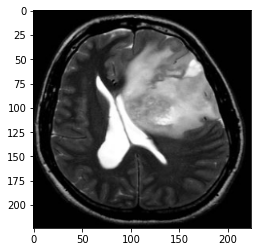

In [33]:
#show one training sample
from matplotlib import pyplot as plt
plt.imshow(img_data[97])
plt.show()

In [34]:
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape
print(num_of_samples)
print(input_shape)

253
(224, 224, 3)


In [35]:
#separating classes into "0" and "1"
classes = np.ones((num_of_samples,), dtype='int64')
classes[0:98]=0
classes[98:]=1

In [36]:
#Convert class labels to numberic using one-hot encoding
from keras.utils import to_categorical
classes = to_categorical(classes, num_classes)
print(classes.shape)

(253, 2)


In [37]:
#Shuffle the dataset
from sklearn.utils import shuffle
X, Y = shuffle(img_data, classes, random_state=456)

In [38]:
print(X)

[[[[0.08627451 0.09411765 0.09019608]
   [0.09411765 0.10196079 0.09803922]
   [0.10588235 0.11372549 0.10980392]
   ...
   [0.10196079 0.10980392 0.10588235]
   [0.06666667 0.07450981 0.07058824]
   [0.5764706  0.58431375 0.5803922 ]]

  [[0.08627451 0.09411765 0.09019608]
   [0.09411765 0.10196079 0.09803922]
   [0.10588235 0.11372549 0.10980392]
   ...
   [0.10196079 0.10980392 0.10588235]
   [0.0627451  0.07058824 0.06666667]
   [0.5764706  0.58431375 0.5803922 ]]

  [[0.08627451 0.09411765 0.09019608]
   [0.09411765 0.10196079 0.09803922]
   [0.10196079 0.11372549 0.10980392]
   ...
   [0.10196079 0.10980392 0.10588235]
   [0.0627451  0.07058824 0.06666667]
   [0.5764706  0.58431375 0.5803922 ]]

  ...

  [[0.09411765 0.09411765 0.09411765]
   [0.09411765 0.09411765 0.09411765]
   [0.09411765 0.09411765 0.09411765]
   ...
   [0.10980392 0.10980392 0.10980392]
   [0.05098039 0.05098039 0.05098039]
   [0.5921569  0.5921569  0.5921569 ]]

  [[0.07843138 0.07843138 0.07843138]
   [0.0

In [39]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=456)
# Check the number of images in each dataset split
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(202, 224, 224, 3) (51, 224, 224, 3)
(202, 2) (51, 2)


# **CNN Model**

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [41]:
#### Build the model
model = Sequential()

model.add(Conv2D(32, (3, 3),activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='sigmoid'))

In [42]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [43]:
#getting model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 53, 53, 64)       

In [44]:
#training the model
%%time
hist = model.fit(X_train, y_train, batch_size=32, epochs=14, verbose=1, validation_data=(X_test, y_test))

Train on 202 samples, validate on 51 samples
Epoch 1/14
202/202 [==============================] - 43s 215ms/step - loss: 0.9037 - accuracy: 0.4926 - val_loss: 0.6826 - val_accuracy: 0.5980
Epoch 2/14
202/202 [==============================] - 41s 203ms/step - loss: 0.6612 - accuracy: 0.6559 - val_loss: 0.6552 - val_accuracy: 0.5882
Epoch 3/14
202/202 [==============================] - 41s 205ms/step - loss: 0.6239 - accuracy: 0.6535 - val_loss: 0.6281 - val_accuracy: 0.6569
Epoch 4/14
202/202 [==============================] - 41s 205ms/step - loss: 0.6206 - accuracy: 0.6460 - val_loss: 0.6280 - val_accuracy: 0.6471
Epoch 5/14
202/202 [==============================] - 41s 205ms/step - loss: 0.5765 - accuracy: 0.6856 - val_loss: 0.6179 - val_accuracy: 0.6176
Epoch 6/14
202/202 [==============================] - 42s 207ms/step - loss: 0.5392 - accuracy: 0.7302 - val_loss: 0.6066 - val_accuracy: 0.6569
Epoch 7/14
202/202 [==============================] - 41s 205ms/step - loss: 0.5437 -

In [45]:
score = model.evaluate(X_test, y_test, batch_size=32)

print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

51/51 [==============================] - 4s 86ms/step
Test Loss: 1.0367503984301698
Test Accuracy: 0.5980392098426819


In [47]:
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

[0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 0 1 1]


In [48]:
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

[[ 8 15]
 [ 5 23]]


## Data Augementation


In [66]:
from keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(
    rotation_range=15,
    shear_range=0.1, 
    zoom_range=0.4, 
    vertical_flip=True,
    brightness_range=[0.5, 1.5],
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

test_data_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_data_gen.flow_from_directory(
        DATA_PATH,
        target_size=(224, 224), 
        batch_size=32,
        class_mode='binary',
        color_mode='rgb', 
        shuffle=True,  
        )

test_generator = test_data_gen.flow_from_directory(
        DATA_PATH,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        color_mode='rgb',
        shuffle=True, 
        seed=None, 
        )

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [67]:
train_generator.class_indices

{'no': 0, 'yes': 1}

In [68]:
test_generator.class_indices

{'no': 0, 'yes': 1}

In [69]:
#### Build the model
model = Sequential()

model.add(Conv2D(32, (3, 3),activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [70]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [71]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 53, 53, 64)       

In [72]:
#training the model 
%%time
hist=model.fit_generator(
    train_generator,
    epochs=20,
    validation_data=test_generator)

Epoch 1/20
8/8 [==============================] - 65s 8s/step - loss: 1.4738 - accuracy: 0.5059 - val_loss: 0.6956 - val_accuracy: 0.6126
Epoch 2/20
8/8 [==============================] - 61s 8s/step - loss: 0.6693 - accuracy: 0.6166 - val_loss: 0.6706 - val_accuracy: 0.6759
Epoch 3/20
8/8 [==============================] - 62s 8s/step - loss: 0.6565 - accuracy: 0.6285 - val_loss: 0.7157 - val_accuracy: 0.6126
Epoch 4/20
8/8 [==============================] - 60s 7s/step - loss: 0.6357 - accuracy: 0.6087 - val_loss: 0.6094 - val_accuracy: 0.7589
Epoch 5/20
8/8 [==============================] - 61s 8s/step - loss: 0.6687 - accuracy: 0.6047 - val_loss: 0.6568 - val_accuracy: 0.6561
Epoch 6/20
8/8 [==============================] - 67s 8s/step - loss: 0.6369 - accuracy: 0.6403 - val_loss: 0.6066 - val_accuracy: 0.6206
Epoch 7/20
8/8 [==============================] - 61s 8s/step - loss: 0.6332 - accuracy: 0.6403 - val_loss: 0.7348 - val_accuracy: 0.6601
Epoch 8/20
8/8 [==================

# Transfer Learning(VGG16)

In [78]:
from keras.layers import Input, Dense
from keras.models import Model

In [79]:
image_input = Input(shape=(224, 224, 3))

In [80]:
from keras.applications.vgg16 import VGG16

model = VGG16(input_tensor=image_input, include_top=False, weights='imagenet')

58892288/58889256 [==============================] - 2s 0us/step


In [81]:
last_layer = model.get_layer('block5_pool').output
x = Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_vgg_model = Model(image_input, out)

In [82]:
custom_vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [83]:
# freeze all the layers except the dense layers
for layer in custom_vgg_model.layers[:-3]:
    layer.trainable = False

In [84]:
custom_vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [85]:
custom_vgg_model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [86]:
#training model
%%time
hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, y_test))

Train on 202 samples, validate on 51 samples
Epoch 1/20
202/202 [==============================] - 119s 589ms/step - loss: 2.1459 - accuracy: 0.5446 - val_loss: 0.8148 - val_accuracy: 0.5294
Epoch 2/20
202/202 [==============================] - 120s 593ms/step - loss: 0.8143 - accuracy: 0.5941 - val_loss: 0.5978 - val_accuracy: 0.6667
Epoch 3/20
202/202 [==============================] - 122s 604ms/step - loss: 0.6928 - accuracy: 0.6238 - val_loss: 0.9382 - val_accuracy: 0.5490
Epoch 4/20
202/202 [==============================] - 121s 601ms/step - loss: 0.6162 - accuracy: 0.6881 - val_loss: 1.1490 - val_accuracy: 0.5490
Epoch 5/20
202/202 [==============================] - 122s 606ms/step - loss: 0.5861 - accuracy: 0.6881 - val_loss: 0.6918 - val_accuracy: 0.5686
Epoch 6/20
202/202 [==============================] - 120s 592ms/step - loss: 0.5266 - accuracy: 0.7228 - val_loss: 0.6050 - val_accuracy: 0.5490
Epoch 7/20
202/202 [==============================] - 121s 600ms/step - loss: 0

In [87]:
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=32, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

51/51 [==============================] - 25s 483ms/step
[INFO] loss=0.9042, accuracy: 56.8627%


In [88]:
Y_train_pred = custom_vgg_model.predict(X_test)

In [89]:
y_train_pred = np.argmax(Y_train_pred, axis=1)
print(y_train_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [90]:
print(confusion_matrix(np.argmax(y_test, axis=1), y_train_pred))

[[ 1 22]
 [ 0 28]]


# Conclusion
The final accuracy is much higher than 50% baseline . However, it could be increased by larger number of train images or through model hyperparameters tuning.